In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
average_ests = pd.read_csv('.//average_ests.csv', index_col=0)
average_ests

,pollutant,mean,std_err,y,seen
0,CO,0.351911,0.033563,95% Interval,0.40
1,NO2,19.021429,2.200518,95% Interval,16.00
2,O3,0.043982,0.001822,95% Interval,0.05
3,SO2,0.207143,0.037518,95% Interval,0.15


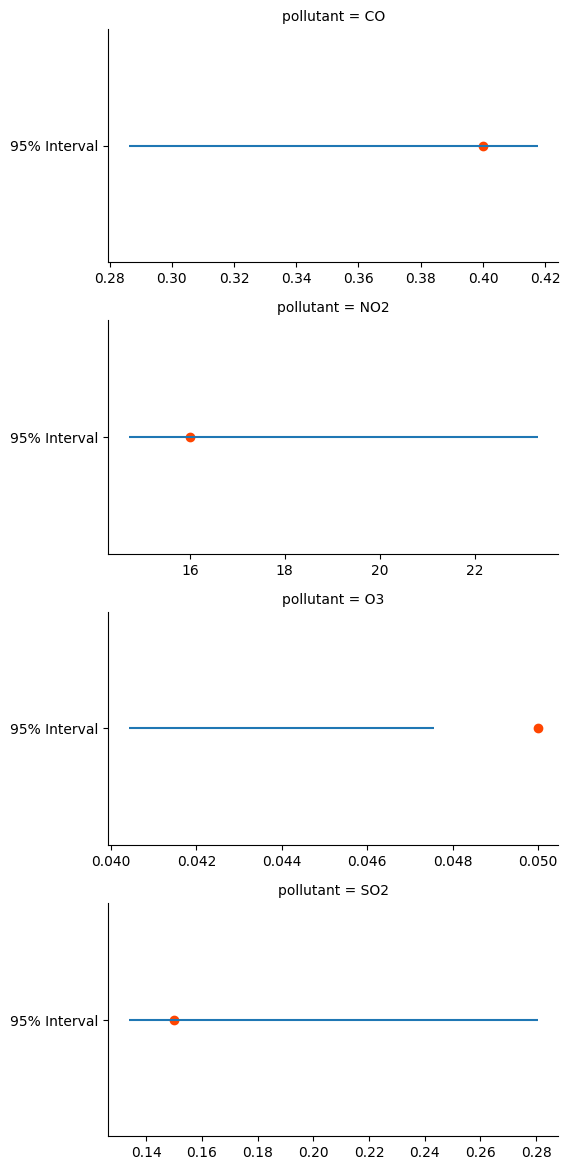

In [3]:
# Construct CI bounds for averages
average_ests['lower'] = average_ests['mean'] - 1.96 * average_ests['std_err']
average_ests['upper'] = average_ests['mean'] + 1.96 * average_ests['std_err']

# Setup a grid of plots, with non-shared x axes limits
g = sns.FacetGrid(average_ests, row='pollutant', sharex=False, aspect=2);

# Plot CI for average estimate
g.map(plt.hlines, 'y', 'lower', 'upper');

# Plot observed values for comparison and remove axes labels
g.map(plt.scatter, 'seen', 'y', color='orangered').set_ylabels('').set_xlabels('');

In [4]:
diffs_by_year = pd.read_csv('.//diffs_by_year.csv', index_col=0)
diffs_by_year

,year,mean,std_err,lower,upper
0,2013,0.840820,0.870135,-0.864645,2.546284
1,2014,-1.337625,0.761541,-2.830245,0.154996
2,2015,-0.649327,0.618175,-1.860950,0.562295


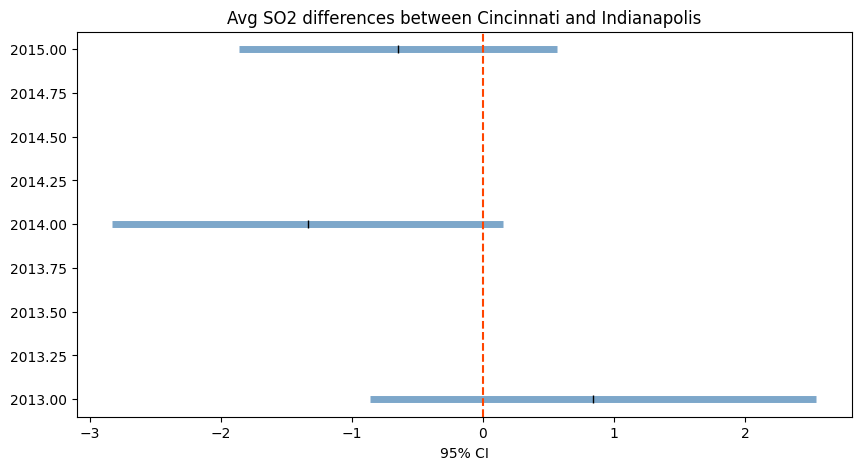

In [5]:
# Set start and ends according to intervals
# Make intervals thicker
plt.hlines(y='year', xmin='lower', xmax='upper', 
          linewidth=5, color='steelblue', alpha=0.7,
          data=diffs_by_year);

# Point estimates
plt.plot('mean', 'year', 'k|', data=diffs_by_year);

# Add a 'null' reference line at 0 and color orangered
plt.axvline(x=0, color='orangered', linestyle='--');

# Set descriptive axis labels and title
plt.xlabel('95% CI');
plt.title('Avg SO2 differences between Cincinnati and Indianapolis');

In [6]:
vandenberg_NO2 = pd.read_csv('.//vandenberg_NO2.csv', index_col=0)
vandenberg_NO2.head()

,day,mean,std_err
0,25,2.56,0.452831
1,26,2.44,0.452831
2,27,2.44,0.452831
3,28,2.44,0.452831
4,29,2.40,0.452548


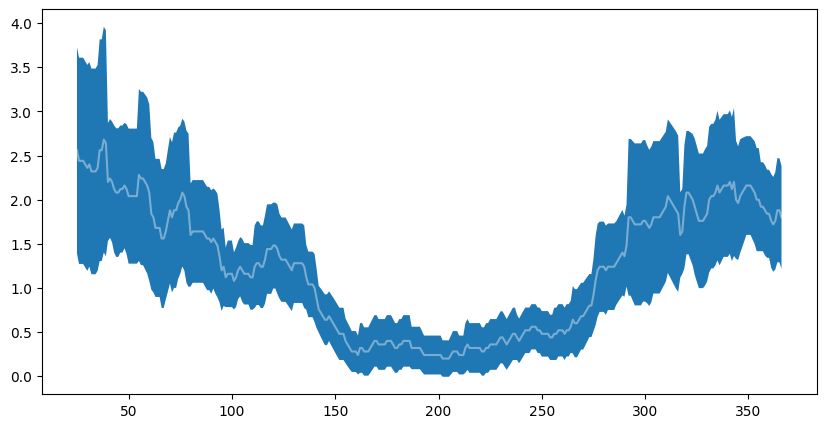

In [7]:
# Draw 99% interval bands for average NO2
vandenberg_NO2['lower'] = vandenberg_NO2['mean'] - 2.58 * vandenberg_NO2['std_err']
vandenberg_NO2['upper'] = vandenberg_NO2['mean'] + 2.58 * vandenberg_NO2['std_err']

# Plot mean estimate as a white semi-transparent line
plt.plot('day', 'mean', data=vandenberg_NO2, color='white', alpha=0.4);

# Fill between the upper and lower confidence band values
plt.fill_between(x='day', y1='lower', y2='upper', data=vandenberg_NO2);

In [8]:
eastern_SO2 = pd.read_csv('.//eastern_SO2.csv', index_col=0)
eastern_SO2.head()

,city,day,mean,std_err,lower,upper
0,Cincinnati,24,8.5150,1.297358,5.972178,11.057822
1,Cincinnati,25,8.8825,1.277753,6.378104,11.386896
2,Cincinnati,26,8.9450,1.281322,6.433609,11.456391
3,Cincinnati,27,8.4775,1.317059,5.896065,11.058935
4,Cincinnati,28,9.2325,1.416357,6.456441,12.008559


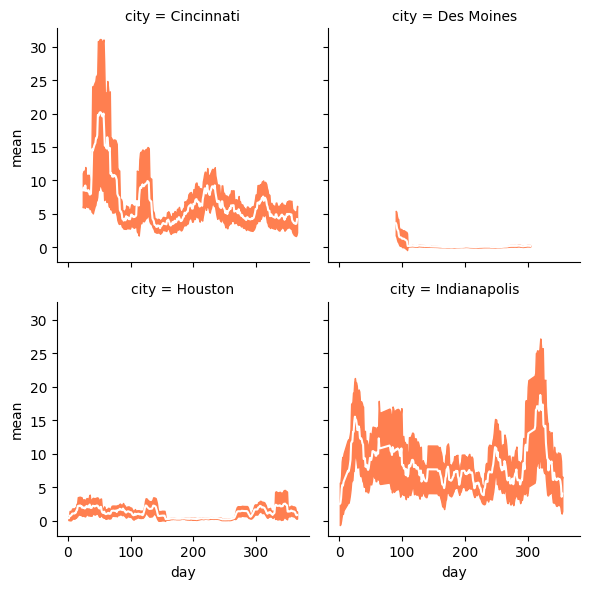

In [9]:
# setup a grid of plots with columns divided by location
g = sns.FacetGrid(eastern_SO2, col='city', col_wrap=2);

# Map interval plots to each cities data with coral colored ribbons
g.map(plt.fill_between, 'day', 'lower', 'upper', color='coral');

# Map overlaid mean plots with white line
g.map(plt.plot, 'day', 'mean', color='white');

In [10]:
SO2_compare = pd.read_csv('.//SO2_compare.csv', index_col=0)
SO2_compare.head()

,city,day,mean,std_err,lower,upper
0,Denver,20,2.5800,0.410722,1.774985,3.385015
1,Denver,21,2.6125,0.405661,1.817404,3.407596
2,Denver,22,2.6775,0.417545,1.859113,3.495887
3,Denver,23,2.6525,0.419382,1.830512,3.474488
4,Denver,24,2.7525,0.416960,1.935258,3.569742


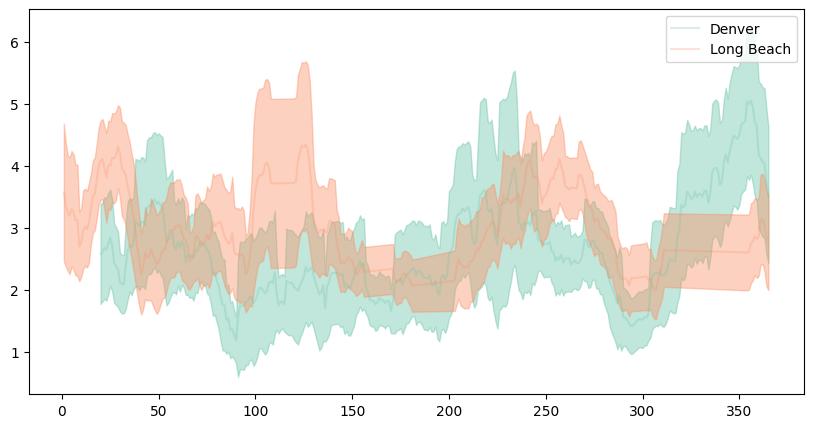

In [11]:
for city, color in [('Denver', '#66c2a5'), ('Long Beach', '#fc8d62')]:
    # Filter data to desired city
    city_data = SO2_compare[SO2_compare.city == city]
    
    # Set city interval color to desired and lower opacity
    plt.fill_between(x='day', y1='lower', y2='upper', data=city_data, color=color, alpha=0.4);
    
    # Draw a faint mean line for reference and give a label for legend
    plt.plot('day', 'mean', data=city_data, label=city, color=color, alpha=0.25);
    
plt.legend();

In [13]:
from statsmodels.formula.api import ols
pollution = pd.read_csv('.//pollution_wide.csv')
pollution = pollution.query("city == 'Fairbanks' & year == 2014 & month == 11")
pollution_model = ols(formula='SO2 ~ CO + NO2 + O3 + day', data=pollution)
res = pollution_model.fit()

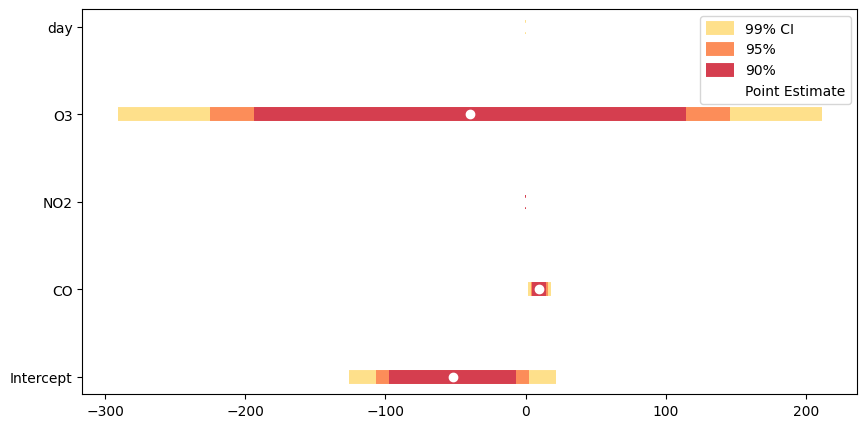

In [14]:
# Add interval percent widths
alphas = [     0.01,  0.05,   0.1] 
widths = [ '99% CI', '95%', '90%']
colors = ['#fee08b','#fc8d59','#d53e4f']

for alpha, color, width in zip(alphas, colors, widths):
    # Grab confidence interval
    conf_ints = res.conf_int(alpha)
    
    # Pass current interval color and legend label to plot
    plt.hlines(y = conf_ints.index, xmin = conf_ints[0], xmax = conf_ints[1],
               colors = color, label = width, linewidth = 10) 

# Draw point estimates
plt.plot(res.params, res.params.index, 'wo', label = 'Point Estimate')

plt.legend(loc = 'upper right')

In [32]:
from statsmodels.formula.api import ols
pollution = pd.read_csv('.//pollution_wide.csv')
# pollution = pollution.query("city == 'Fairbanks' & year == 2014 & month == 11")
pollution_model = ols(formula='SO2 ~ CO + NO2 + O3 + day', data=pollution)
pollution_model = pollution_model.fit()

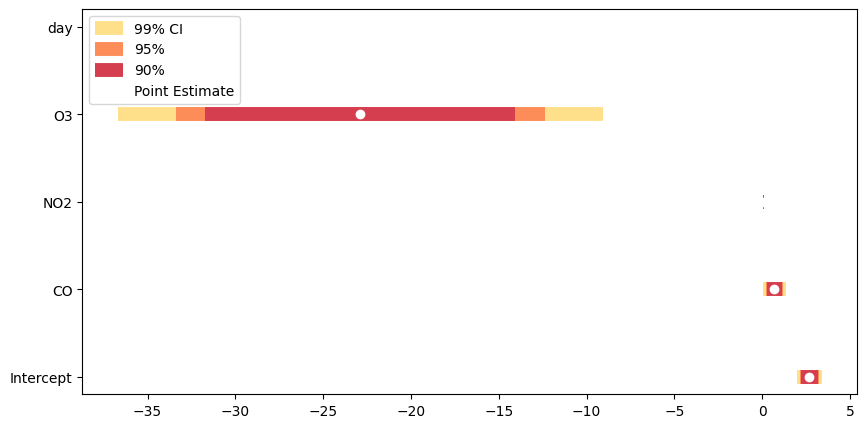

In [33]:
# Add interval percent widths
alphas = [     0.01,  0.05,   0.1] 
widths = [ '99% CI', '95%', '90%']
colors = ['#fee08b','#fc8d59','#d53e4f']

for alpha, color, width in zip(alphas, colors, widths):
    # Grab confidence interval
    conf_ints = pollution_model.conf_int(alpha)
    
    # Pass current interval color and legend label to plot
    plt.hlines(y = conf_ints.index, xmin = conf_ints[0], xmax = conf_ints[1],
               colors = color, label = width, linewidth = 10) 

# Draw point estimates
plt.plot(pollution_model.params, pollution_model.params.index, 'wo', label = 'Point Estimate')

plt.legend()
plt.show() 

In [34]:
cinci_13_no2 = pd.read_csv('.//cinci_13_no2.csv', index_col=0);
cinci_13_no2.head()

,day,mean,std_err
0,82,25.425,1.447795
1,83,25.250,1.429051
2,84,25.425,1.435656
3,85,25.275,1.454728
4,86,25.025,1.438092


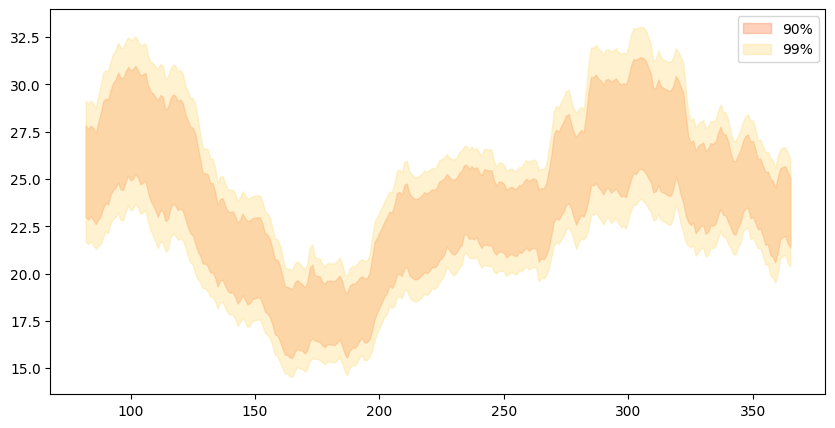

In [35]:
int_widths = ['90%', '99%']
z_scores = [1.67, 2.58]
colors = ['#fc8d59', '#fee08b']

for percent, Z, color in zip(int_widths, z_scores, colors):
    
    # Pass lower and upper confidence bounds and lower opacity
    plt.fill_between(
        x = cinci_13_no2.day, alpha = 0.4, color = color,
        y1 = cinci_13_no2['mean'] - Z * cinci_13_no2['std_err'],
        y2 = cinci_13_no2['mean'] + Z * cinci_13_no2['std_err'],
        label = percent);
    
plt.legend();

In [36]:
rocket_model = pd.read_csv('.//rocket_model.csv', index_col=0)
rocket_model

,pollutant,est,std_err
0,SO2,0.138185,0.034651
1,NO2,0.320121,0.049849
2,CO,0.084282,0.024758
3,O3,0.565368,0.022191


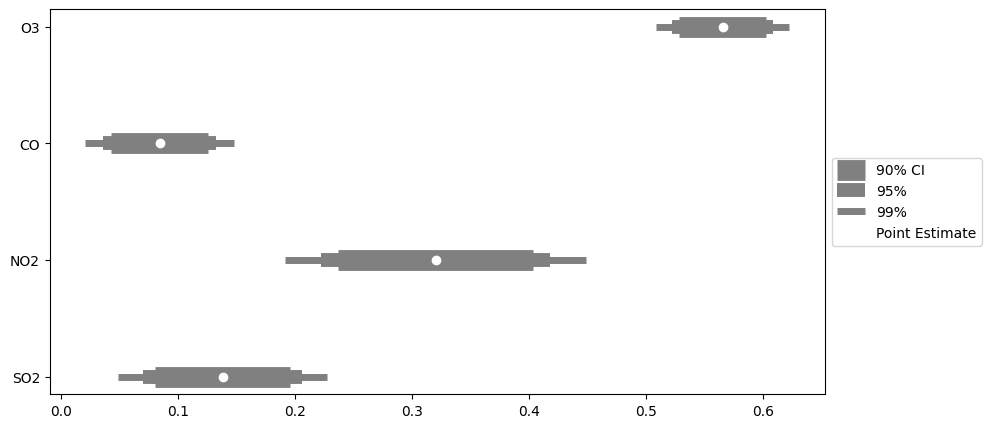

In [37]:
# Decrase interval thickness as interval widens
sizes =      [    15,  10,  5]
int_widths = ['90% CI', '95%', '99%']
z_scores =   [    1.67,  1.96,  2.58]

for percent, Z, size in zip(int_widths, z_scores, sizes):
    plt.hlines(y = rocket_model.pollutant, 
               xmin = rocket_model['est'] - Z * rocket_model['std_err'],
               xmax = rocket_model['est'] + Z * rocket_model['std_err'],
               label = percent, 
               # Resize lines and color them gray
               linewidth = size, 
               color = 'gray'); 
    
# Add point estimate
plt.plot('est', 'pollutant', 'wo', data = rocket_model, label = 'Point Estimate');
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5));

In [38]:
# Perform bootstrapped mean on a vector
def bootstrap(data, n_boots):
    return [np.mean(np.random.choice(data,len(data))) for _ in range(n_boots) ]

In [43]:
cinci_may_NO2 = pollution.query("city  ==  'Cincinnati' & month  ==  5").NO2

# Generate bootstrap samples
boot_means = bootstrap(cinci_may_NO2, 1000)

# Get lower and upper 95% interval bounds
lower, upper = np.percentile(boot_means, [2.5, 97.5])

# Plot shaded area for interval
# plt.axvspan(lower, upper, color = 'gray', alpha = 0.2);

# Draw histogram of bootstrap samples
# sns.distplot(boot_means, bins = 100, kde = False);

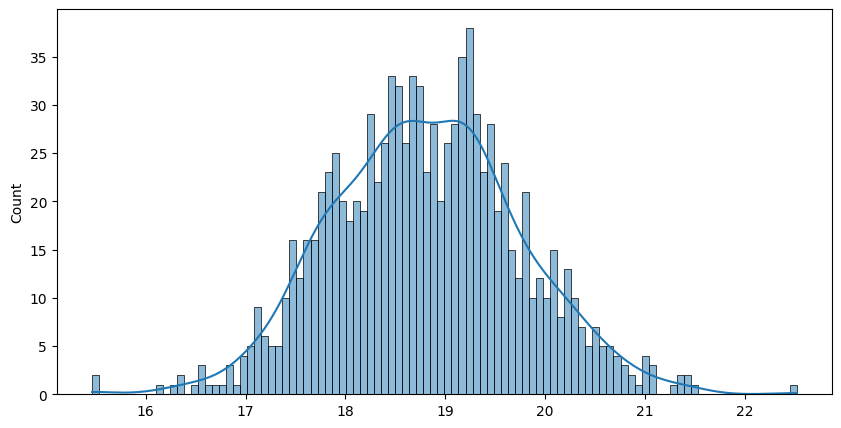

In [41]:
sns.histplot(boot_means, bins = 100, kde = True);

In [45]:
no2_so2 = pd.read_csv('.//no2_so2.csv', index_col=0)
no2_so2_boot = pd.read_csv('.//no2_so2_boot.csv', index_col=0)

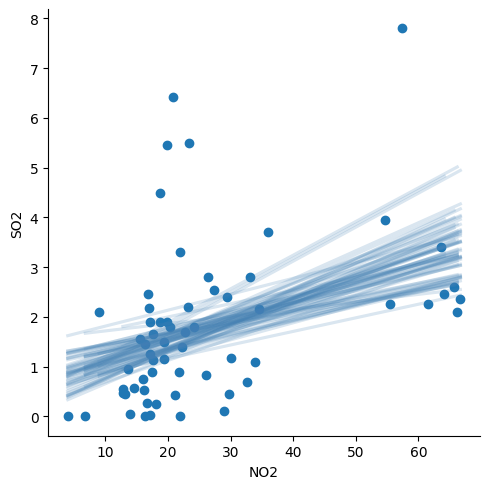

In [47]:
sns.lmplot(x='NO2', y='SO2', data = no2_so2_boot,
           # Tell seaborn to a regression line for each sample
           hue = 'sample', 
           # Make lines blue and transparent
           line_kws = {'color': 'steelblue', 'alpha': 0.2},
           # Disable built-in confidence intervals
           ci = None, legend = False, scatter = False);

# Draw scatter of all points
plt.scatter('NO2', 'SO2', data = no2_so2);

In [49]:
pollution_may = pollution.query("month == 5")
pollution_may

,city,year,month,day,CO,NO2,O3,SO2
136,Cincinnati,2013,5,121,0.640,33.0,0.055,1.85
137,Cincinnati,2013,5,122,0.315,23.0,0.043,4.10
138,Cincinnati,2013,5,123,0.260,13.0,0.039,4.75
139,Cincinnati,2013,5,124,0.245,17.0,0.051,4.45
140,Cincinnati,2013,5,125,0.230,12.0,0.032,0.85
...,...,...,...,...,...,...,...,...
8673,Vandenberg Air Force Base,2015,5,137,0.000,1.0,0.044,0.50
8674,Vandenberg Air Force Base,2015,5,138,0.000,2.0,0.043,1.00
8675,Vandenberg Air Force Base,2015,5,139,0.000,0.0,0.041,0.50
8676,Vandenberg Air Force Base,2015,5,140,0.000,0.0,0.044,0.50


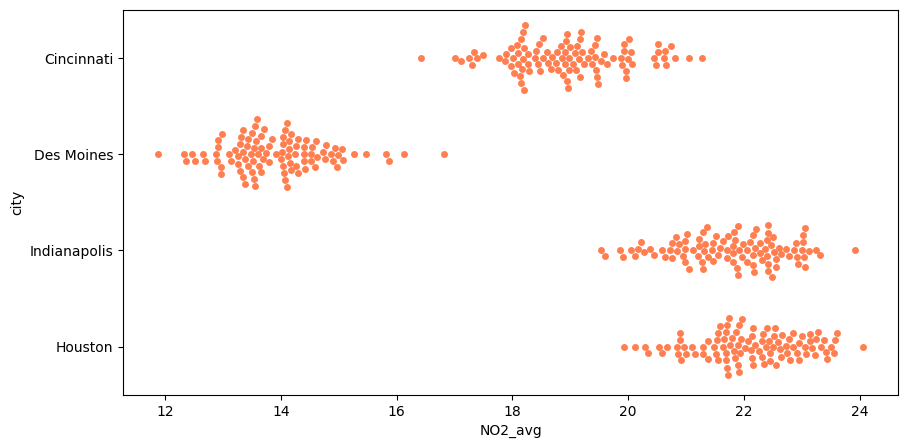

In [50]:
# Initialize a holder DataFrame for bootstrap results
city_boots = pd.DataFrame()

for city in ['Cincinnati', 'Des Moines', 'Indianapolis', 'Houston']:
    # Filter to city
    city_NO2 = pollution_may[pollution_may.city  ==  city].NO2
    # Bootstrap city data & put in DataFrame
    cur_boot = pd.DataFrame({'NO2_avg': bootstrap(city_NO2, 100), 'city': city})
    # Append to other city's bootstraps
    city_boots = pd.concat([city_boots,cur_boot])

# Beeswarm plot of averages with citys on y axis
sns.swarmplot(y = "city", x = "NO2_avg", data = city_boots, color = 'coral');